# Assignment 2
# Notebook to be run for the results

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.colors as mcolors
import scipy.sparse.linalg as sparse
import scipy.sparse._csr as csr
from tqdm import tqdm   
from numba import jit
from matplotlib.path import Path
from scipy.spatial.distance import cdist
from matplotlib.patches import PathPatch
from scipy.stats import linregress 
from scipy.sparse import lil_matrix

In [2]:
from lattice_kochCurve import *
from eigen_matrices import *
from plotting import *
from solve import *

In [3]:
%matplotlib inline

In [4]:
# Some constants and parameters
L = 1
numEigVals = 10

## Fractal creation

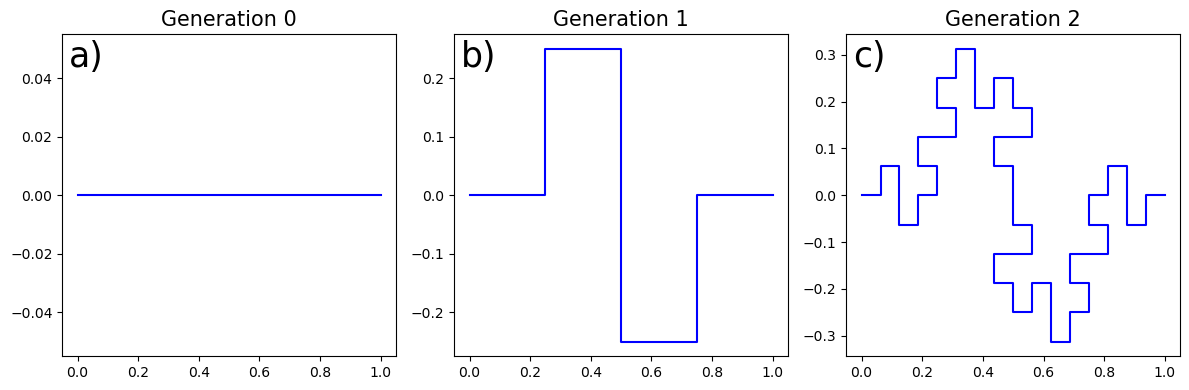

In [5]:
# Figure 1
plotKochLineCurve()

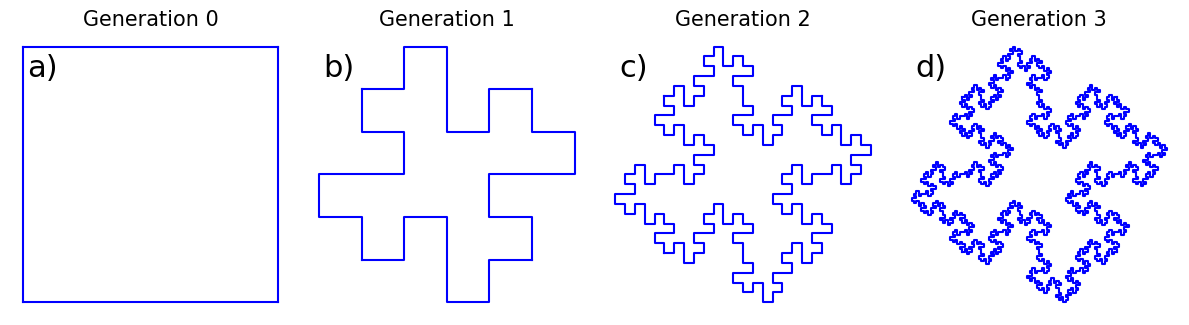

In [6]:
# Figure 2
plotKochSquares(L)

In [7]:
level = 2
delta = L / 4**level

kochCurve1 = kochSquare(L, level)

latticePoints, xVals, yVals = createLattice(L, level, kochCurve1)

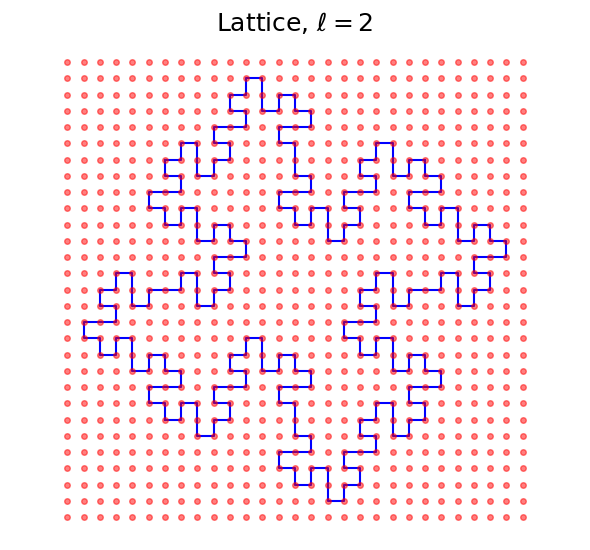

In [8]:
# Figure 3
plotKochSquareLattice(kochCurve1, latticePoints)

## Create classification lattices


In [5]:
# Level 3:
level = 3
delta = L / 4**level
kochCurveLevel3 = kochSquare(L, level)
latticePointsLevel3, xValsLevel3, yValsLevel3 = createLattice(L, level, kochCurveLevel3)
classificationPointsLevel3 = classification(latticePointsLevel3, kochCurveLevel3, level, save = True)

3073it [00:00, 6259881.59it/s]


In [6]:
# Make square matrix 
N3 = int(np.sqrt(len(latticePointsLevel3)))
classifiedSquareMatrixLevel3 = classificationPointsLevel3.reshape(N3, N3)

In [ ]:
# Level 4:
# This could take a while to run, should be saved by putting save = True.
level = 4
delta = L / 4**level
kochCurveLevel4 = kochSquare(L, level)
latticePointsLevel4, xValsLevel4, yValsLevel4 = createLattice(L, level, kochCurveLevel4)
classificationPointsLevel4 = classification(latticePointsLevel4, kochCurveLevel4, level, save = True)

# After running the code above, the classisfication lattice for level 4 should be loaded whenever used again.

57345it [00:00, 6827396.83it/s]


In [ ]:
# Make square matrix 
N4 = int(np.sqrt(len(latticePointsLevel4)))
classifiedSquareMatrixLevel4 = classificationPointsLevel4.reshape(N4, N4)

## Solve fivepoint

In [9]:
method = "fivepoint"

### Level 3

In [10]:
level = 3
delta = L / 4**level


In [11]:
# Create the Laplacian matrix
eigenMatrixFivepointLevel3 = createEigenMatrix(method, classifiedSquareMatrixLevel3, delta, level, L)

eigValsFivepointLevel3, eigVecsFivepointLevel3 = solveEigenProblem(eigenMatrixFivepointLevel3, numEigVals, level, method, save=True)
# Eigenvalues can be found in the files now. 

100%|██████████| 3073/3073 [00:00<00:00, 592112.10it/s]


In [12]:
print("Eigenvalues for level 3 with five-point method:")
print(eigValsFivepointLevel3)

Eigenvalues for level 3 with five-point method:
[ 9.42677306 14.14203701 14.14203701 14.41383236 14.48892034 15.06224437
 15.06224437 17.63211617 18.88487209 19.41669838]


### Level 4

In [13]:
level = 4
delta = L / 4**level

In [14]:
# Create the Laplacian matrix
eigenMatrixFivepointLevel4 = createEigenMatrix(method, classifiedSquareMatrixLevel4, delta, level, L)

eigValsFivepointLevel4, eigVecsFivepointLevel4 = solveEigenProblem(eigenMatrixFivepointLevel4, numEigVals, level, method, save=True)
# Eigenvalues can be found in the files now.

100%|██████████| 57345/57345 [00:00<00:00, 771659.36it/s]


In [15]:
print("Eigenvalues for level 4 with five-point method:")
print(eigValsFivepointLevel4)

Eigenvalues for level 4 with five-point method:
[ 9.42993763 14.14689239 14.14689239 14.41990157 14.49686008 15.08239846
 15.08239846 17.6558802  18.91135324 19.45633835]


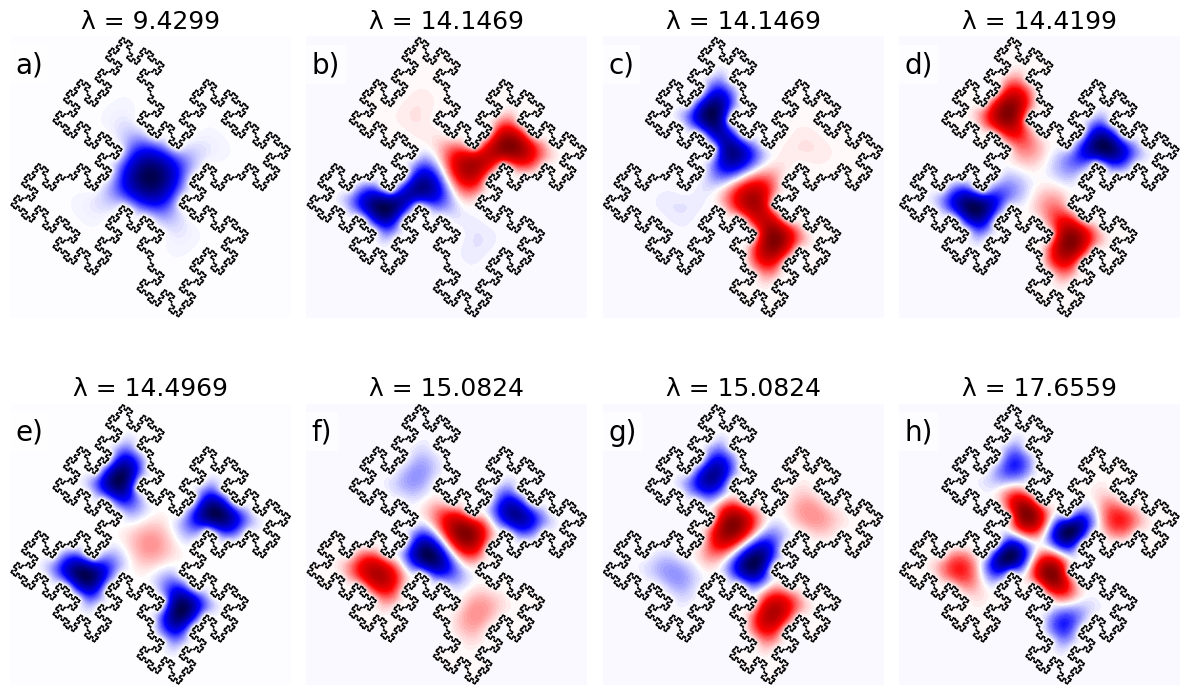

In [ ]:
# Figure 4, will plot the first 8 eigenmodes for level 4

mode_indices = [0, 1, 2, 3, 4, 5, 6, 7]

plotEigenmodes(eigVecsFivepointLevel4, eigValsFivepointLevel4, classificationPointsLevel4, xValsLevel4,
                yValsLevel4, mode_indices, level, numEigVals, method, kochCurveLevel4, save=False)

# Note: Colors may be flipped from the ones in the paper, but the eigenmodes are the same.

## Solve Nine-Point

In [17]:
method = 'ninepoint'

### Level 3

In [19]:
level = 3
delta = L / 4**level

In [20]:
# Create the Laplacian matrix
eigenMatrixNinepointLevel3 = createEigenMatrix(method, classifiedSquareMatrixLevel3, delta, level, L)

eigValsNinepointLevel3, eigVecsNinepointLevel3 = solveEigenProblem(eigenMatrixNinepointLevel3, numEigVals, level, method, save=True)
# Eigenvalues can be found in the files now. 

100%|██████████| 3073/3073 [00:00<00:00, 142737.97it/s]


In [21]:
print("Eigenvalues for level 3 with nine-point method:")
print(eigValsNinepointLevel3)

Eigenvalues for level 3 with nine-point method:
[ 9.39178525 14.05332235 14.05332235 14.32121098 14.39974918 15.00035368
 15.00035368 17.54236899 18.77551974 19.30842349]


### Level 4

In [22]:
level = 4
delta = L / 4**level

In [23]:
# Create the Laplacian matrix
eigenMatrixNinepointLevel4 = createEigenMatrix(method, classifiedSquareMatrixLevel4, delta, level, L)

eigValsNinepointLevel4, eigVecsNinepointLevel4 = solveEigenProblem(eigenMatrixNinepointLevel4, numEigVals, level, method, save=True)
# Eigenvalues can be found in the files now. 

100%|██████████| 57345/57345 [00:00<00:00, 191714.22it/s]


In [24]:
print("Eigenvalues for level 4 with nine-point method:")
print(eigValsNinepointLevel4)

Eigenvalues for level 4 with nine-point method:
[ 9.42047789 14.12421735 14.12421735 14.3959519  14.47371102 15.06643251
 15.06643251 17.63447978 18.88573385 19.43018841]


## Solve biharmonic

In [27]:
method = 'biharmonic'
numEigVals = 8

### Level 3

In [28]:
level = 3
delta = L / 4**level


In [ ]:
# Create the Laplacian matrix
eigenMatrixBiharmonicLevel3 = createEigenMatrix(method, classifiedSquareMatrixLevel3, delta, level, L)

eigValsBiharmonicLevel3, eigVecsBiharmonicLevel3 = solveEigenProblem(eigenMatrixBiharmonicLevel3, numEigVals, level, method, save=True)
# Eigenvalues can be found in the files now, there without the imaginary part. 
# The solver worker much faster when using sparse.eigs insteas of sparse.linalg.eigsh. 
# The imaginary part comes from using sparse.eigs.

100%|██████████| 3073/3073 [00:00<00:00, 297429.24it/s]


In [30]:
print("Eigenvalues for level 3 with biharmonic method:")
print(eigValsBiharmonicLevel3)


Eigenvalues for level 3 with biharmonic method:
[ 26227.92500458+0.j 210696.78094562+0.j 106163.25528397+0.j
 106163.25528402+0.j 157817.61535721+0.j 157818.36181917+0.j
 157818.60590219+0.j 157818.60590226+0.j]


### Level 4

In [31]:
level = 4
delta = L / 4**level

In [ ]:
# Create the Laplacian matrix
eigenMatrixBiharmonicLevel4 = createEigenMatrix(method, classifiedSquareMatrixLevel4, delta, level, L)

# Note: This solving take a looong time. Very important to save. 

eigValsBiharmonicLevel4, eigVecsBiharmonicLevel4 = solveEigenProblem(eigenMatrixBiharmonicLevel4, numEigVals, level, method, save=True)
# Eigenvalues can be found in the files now, there without the imaginary part. 
# The solver worked much faster when using sparse.eigs insteas of sparse.linalg.eigsh.
# The imaginary part comes from using sparse.eigs, however it is very small.
# Don't know enough about the solver to know why the small imaginary part is there for some of the eigenvalues.

100%|██████████| 57345/57345 [00:00<00:00, 406264.44it/s]


KeyboardInterrupt: 

In [ ]:
print("Eigenvalues for level 4 with biharmonic method:")
print(eigValsBiharmonicLevel4)

Eigenvalues for level 4 with biharmonic method:
[ 28749.31584862+0.00000000e+00j 117376.02609534+1.89500878e-07j
 117376.02609534-1.89500878e-07j 237588.17839142+0.00000000e+00j
 184108.10293688+0.00000000e+00j 184109.71746613+0.00000000e+00j
 184111.44440673+0.00000000e+00j 184111.44439761+0.00000000e+00j]


/Users/haakonmonclair/Documents/Studiet/6_semester/NumFys/oving_2 copy/solve.py:172: ComplexWarning: Casting complex values to real discards the imaginary part
  eigenLattice[idx] = eigenVec[i]


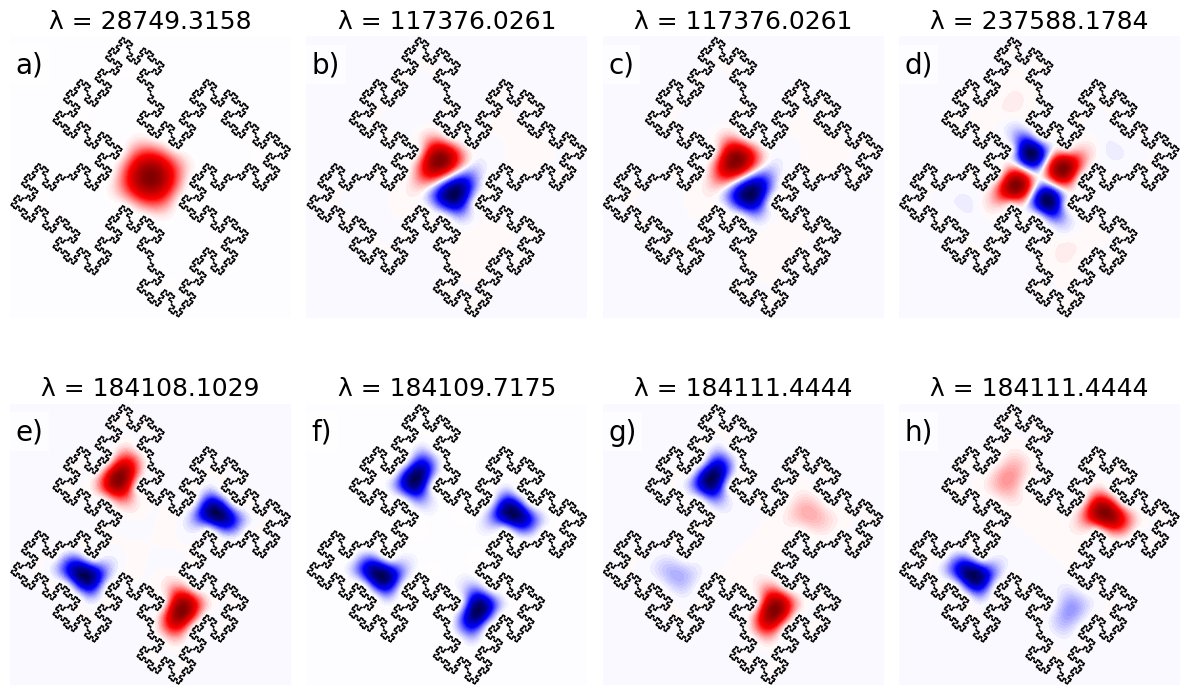

In [ ]:
# Figure 6, Plot the first 8 eigenmodes for level 4
eigValsBiharmonicLevel4Real = eigValsBiharmonicLevel4.real

plotEigenmodes(eigVecsBiharmonicLevel4, eigValsBiharmonicLevel4Real, classificationLatticeLevel4, xValsLevel4,
                yValsLevel4, mode_indices, level, numEigVals, method, kochCurveLevel4, save=False)

## Weyl-Berry Conjecture Analysis

In [37]:
numEigVals = 1000
method = 'fivepoint'

In [ ]:
# First we need to get 1000 eigenvalues for the five-point method for both level 3 and level 4.
# This may take a while to run, so the eigenvalues should be saved in the files.
# The subsequent plotting function will load the eigenvalues from the files. So it is necessary to save them.

level = 3
delta = L / 4**level

eigValsFivepointLevel3_1000, eigVecsFivepointLevel3_1000 = solveEigenProblem(eigenMatrixFivepointLevel3, numEigVals, level, method, save=True)


In [ ]:
level = 4
delta = L / 4**level

eigValsFivepointLevel4_1000, eigVecsFivepointLevel4_1000 = solveEigenProblem(eigenMatrixFivepointLevel4, numEigVals, level, method, save=True)

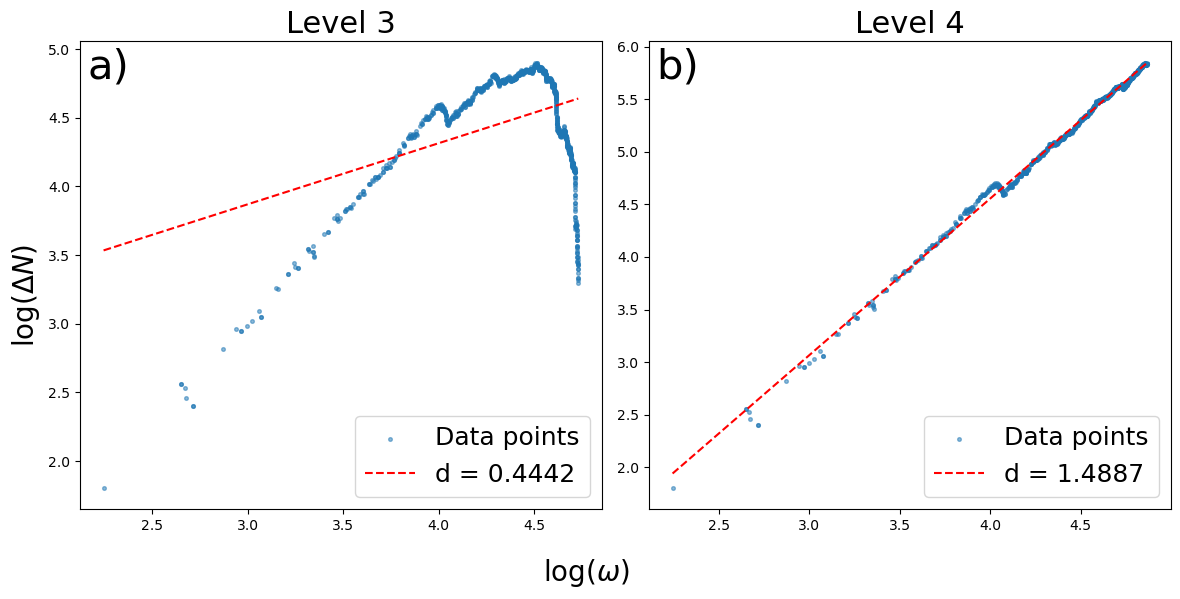

In [ ]:
# Figure 5
levels = [3, 4]

plotDeltaNMultipleLevels(levels, 1000, method)